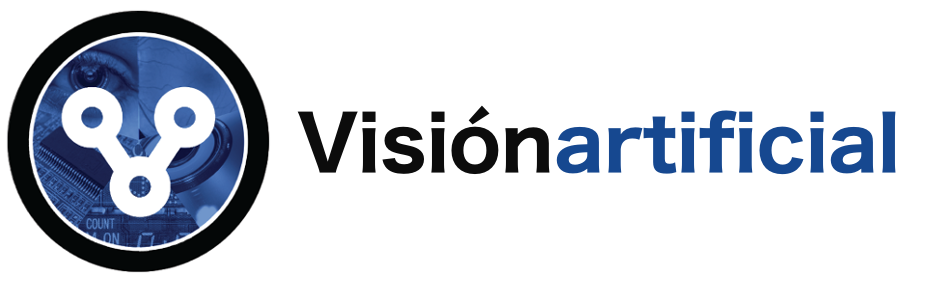

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Descriptor de textura de Haralick</font>

Como o nome indica, as funcións de textura de Haralick úsanse para describir a "textura" dunha imaxe. Se estás tentando cuantificar e representar a sensación, a aparencia ou a consistencia dunha superficie, as características de textura Haralick son un bo punto de partida.

Por exemplo, as características de textura Haralick pódense usar para distinguir entre superficies rugosas e lisas. Tamén se poden usar para distinguir entre rochas, area e ladrillos. Incluso para cuantificar e representar a textura dos tecidos.

O descritor de texturas Haralick foi proposto polo propio Haralick no seu artigo [Textural Features for Image Classification](./artigos/haralick_1973.pdf) de 1973.

As características de Haralick derívanse da Matriz de Co-ocurrencia de Nivel Gris (GLCM). Esta matriz rexistra cantas veces aparecen dous píxeles de nivel de grises adxacentes entre si nunha imaxe. Despois, baseándose nesta matriz, Haralick propón 13 valores que se poden extraer do GLCM para cuantificar a textura. Pódense calcular 14 valores adicionais; porén, non se usan a miúdo debido á inestabilidade computacional.

Podes usar as funcións de Haralick na túa propia aplicación utilizando o paquete **mahotas**. OpenCV e scikit-image non teñen un método directo para calcular as características de textura de Haralick.



## <font style="color:rgb(50,120,229)">Obxectivos</font>

Neste caderno ocuparemonos dos descritores de textura de Haralick.
     
     
## <font style="color:rgb(50,120,229)">Cales son as características de textura Haralick utilizadas como descritores?</font>  

As características de Haralick úsanse para describir a textura dunha imaxe. A textura refírese ao aspecto, consistencia ou "sensación" dunha superficie. Exemplos de texturas inclúen "rugoso" e "suave". As posibles aplicacións das funcións de Haralick inclúen a determinación de se unha estrada está pavimentada en comparación con grava.


## <font style="color:rgb(50,120,229)">Como funcionan funcións de textura de Haralick?</font>   

As características de textura de Haralick calcúlanse mediante a **Matriz de co-ocurrencia de nivel de grises (GLCM)**. Esta matriz caracteriza a textura rexistrando a frecuencia con que aparecen pares de píxeles adxacentes con valores específicos nunha imaxe.

Para entender como funciona o GLCM, imos ollar á seguinte figura, onde os valores de cada bloque representan a intensidade de píxeles dunha imaxe en escala de grises (canle único):
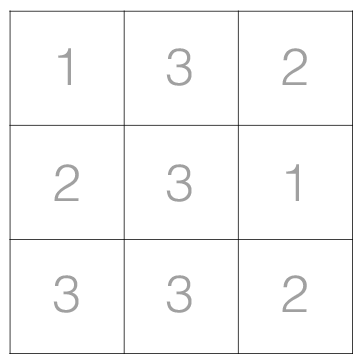
Despois, para construír a nosa GLCM, miramos os pares de píxeles adxacentes e rexistramos o número de veces que aparecen estes dous valores un ao carón do outro:


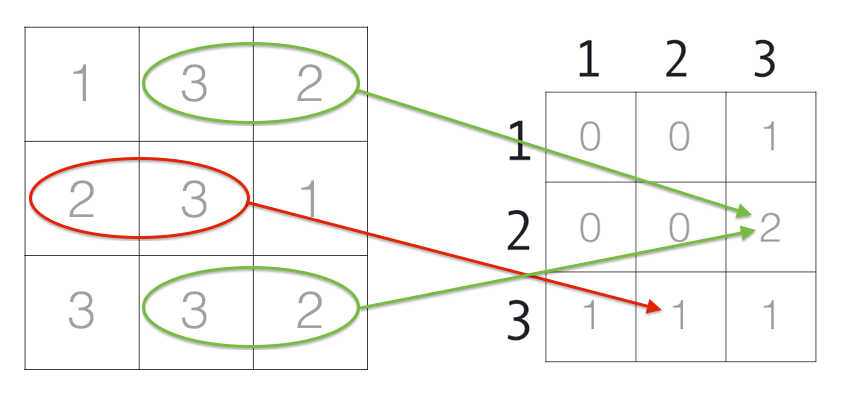

Aquí podemos ver que as intensidades de píxeles 2 e 3 aparecen unha á beira da outra unha vez, polo que teñen unha entrada de 1 na GLCM. As intensidades de píxeles 3 e 2; non obstante, aparecen dúas veces unha ao lado da outra, polo que teñen unha entrada correspondente de 2 no GLCM.

Non obstante, non nos limitamos só a rexistrar o número de veces que aparece un valor de píxel á esquerda ou á dereita dun píxel determinado. En realidade, podemos especificar catro direccións diferentes de adxacencia: de esquerda a dereita, de arriba a abaixo, de arriba a esquerda a inferior dereita e de arriba a dereita a inferior esquerda:

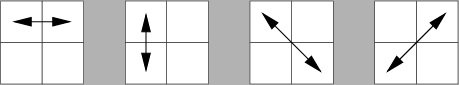

Isto déixanos cun total de catro matrices GLCM que podemos usar para calcular as características de Haralick. Estas serán valores estatísticos achados a partir do GLCM e utilizados para caracterizar e representar contraste, correlación, disemellanza, entropía, homoxeneidade e outras propiedades estatísticas desexables.

En lugar de enumerar cada unha das 14 ecuacións, remito aos lectores interesados que boten unha ollada ao artigo orixinal de Haralick. 

Despois de calcular estas estatísticas para cada un dests GLCM obtemos catro vectores de características (unha fila por dirección), cada unha de 13 dimensións (ou 14 dimensións).

Finalmente, tomamos a media destas direccións para formar un vector de características final de 13 dimensións. Esta media realízase nun intento de facer que o vector de características sexa máis robusto nos cambios de rotación. 

## <font style="color:rgb(50,120,229)">Onde están implementados os momentos as funcións de Haralick?</font>

As características de Haralick están implementadas dentro do paquete mahotas Python.

## <font style="color:rgb(50,120,229)">Clasificación de texturas usando funcións Haralick</font>

Nesta sección aprenderemos a extraer as características de textura Haralick dun pequeno conxunto de datos de imaxes e, a continuación, aplicaremos a aprendizaxe automática para clasificar a textura delas.

Antes de comezar, necesitaremos crear un conxunto de datos de texturas. Para formar este conxunto de datos, recollín 20 fotos de varias texturas e estampados:


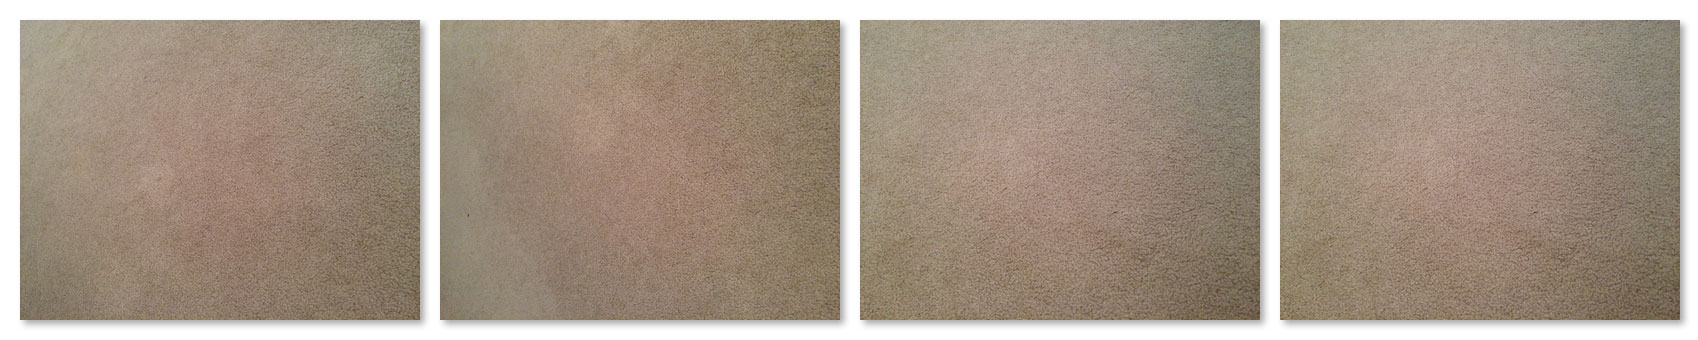

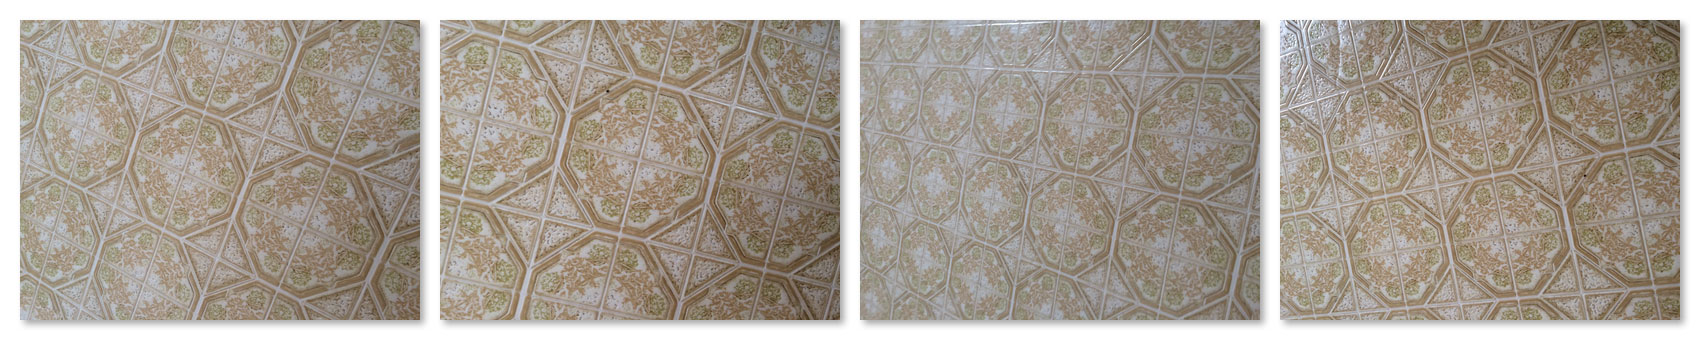

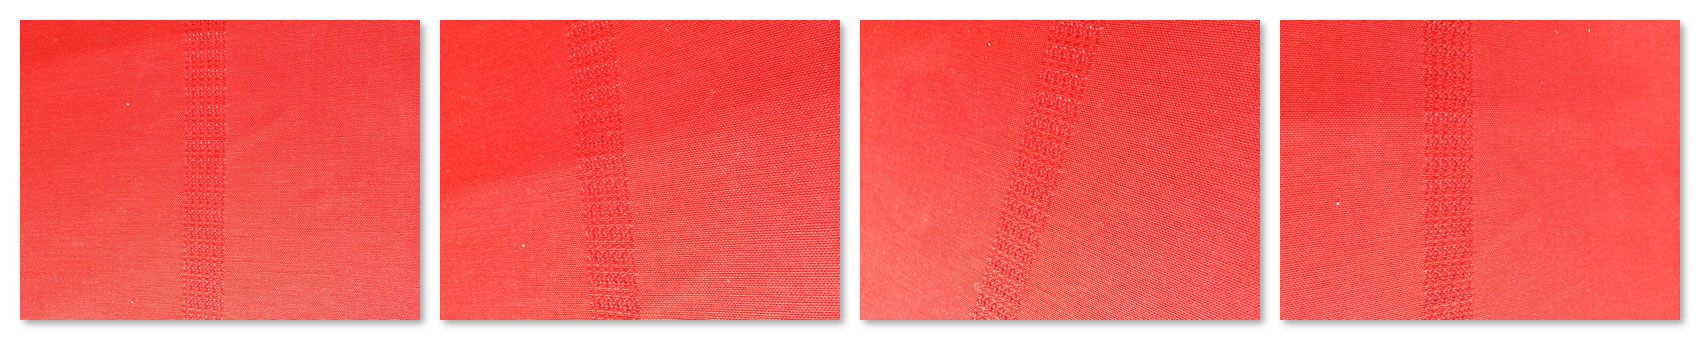

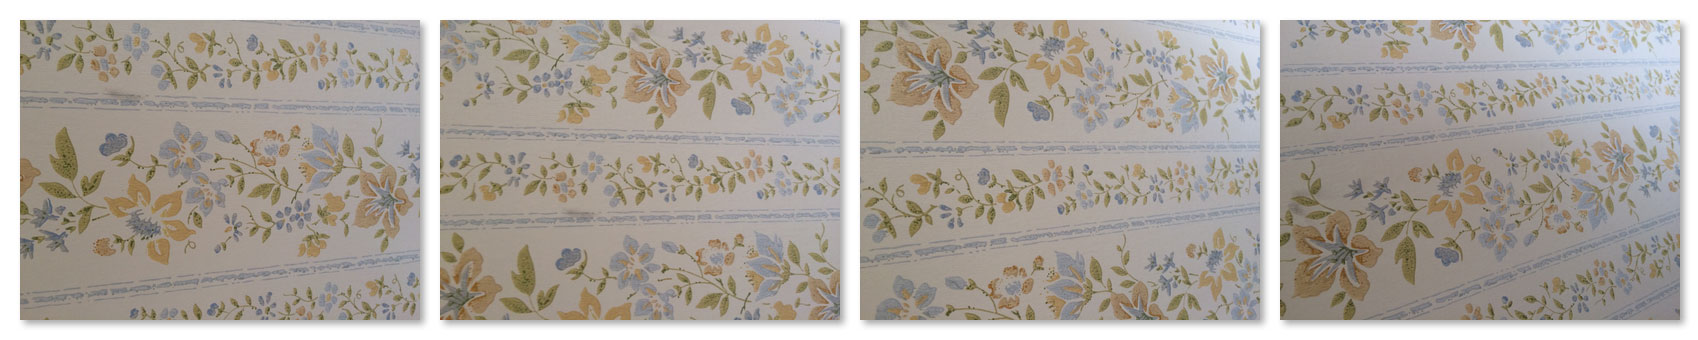

Tendo en conta este conxunto de datos de alfombras, chan laminado, papel de parede e manteis, o noso obxectivo é extraer as características de textura Haralick destas imaxes e aplicar a aprendizaxe automática para recoñecer e categorizar estas imaxes de textura.

Imos adiante!

[INFO] extraendo as caracteristicas de textura...
[INFO] entrenando o modelo...
[INFO] clasificando...


/home/xose/.virtualenvs/VAA/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


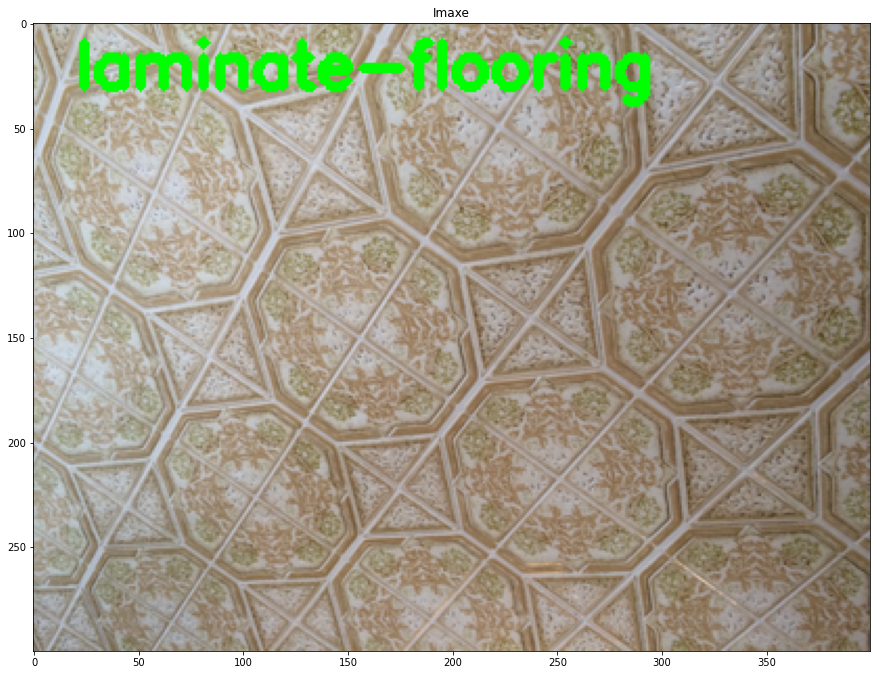

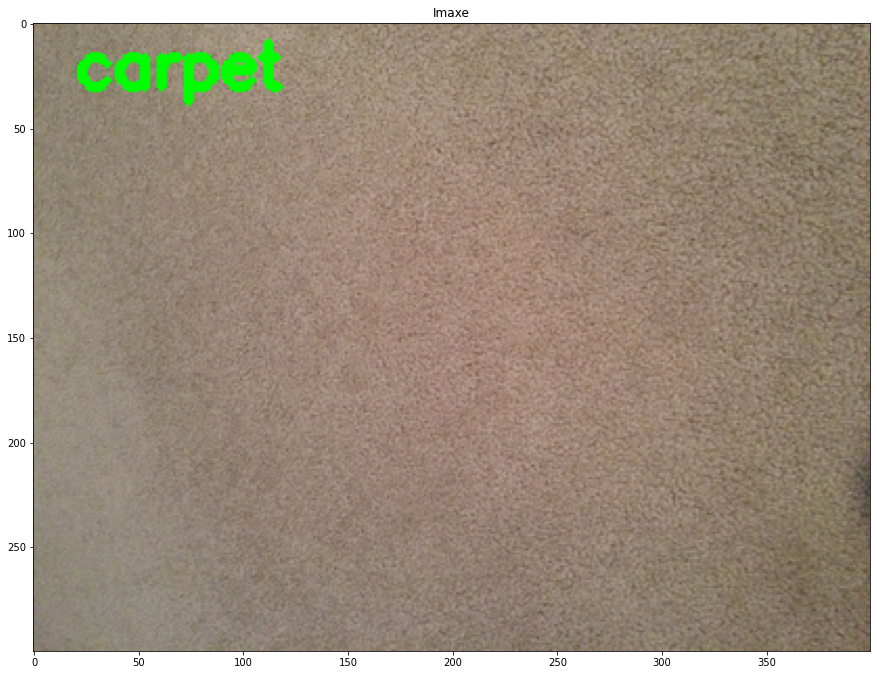

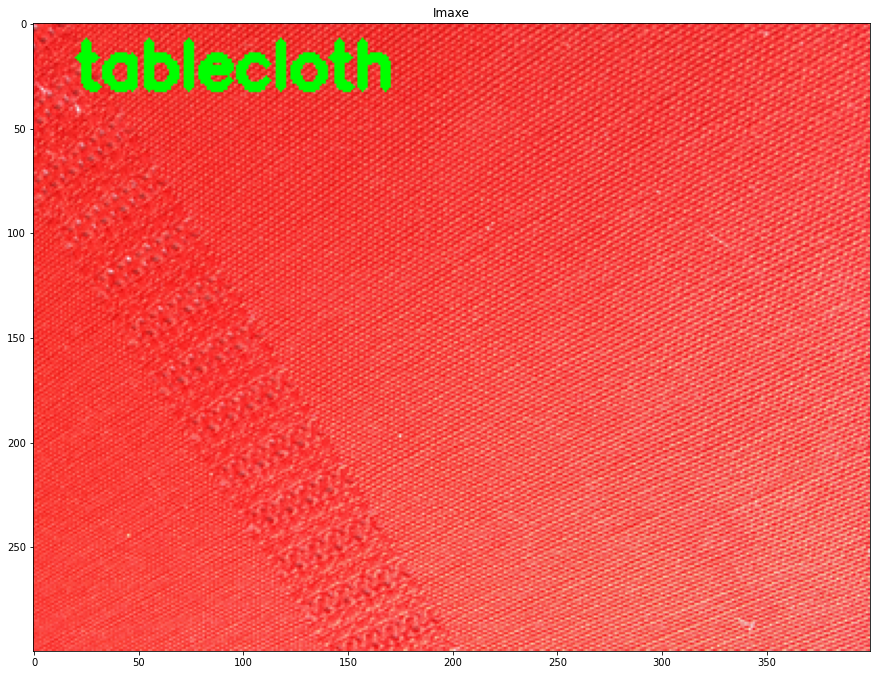

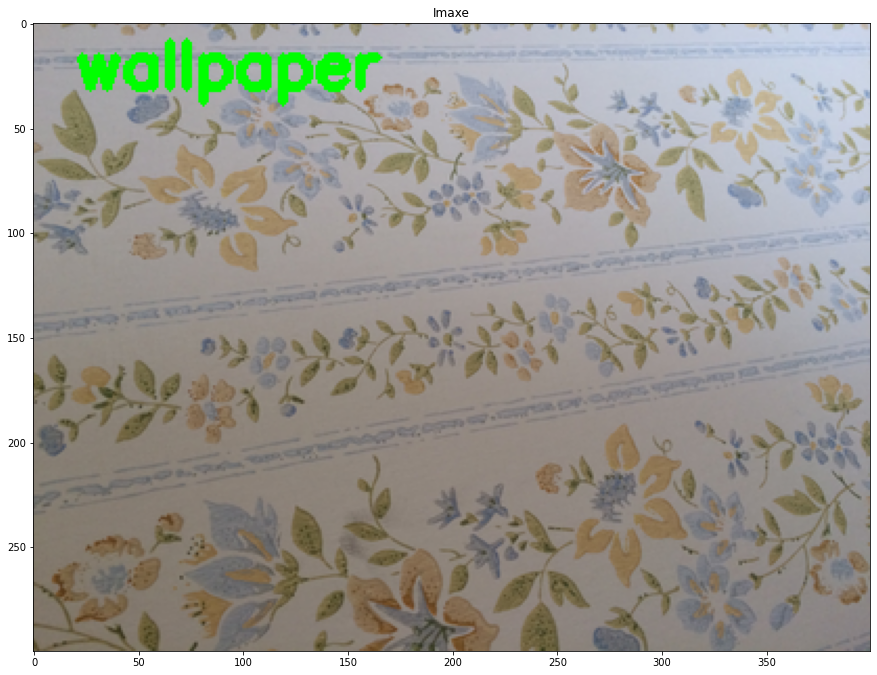

In [9]:
# Importacions estandar
import cv2
import numpy as np;
import imutils
import glob
from sklearn.svm import LinearSVC
import mahotas #pip install mahotas==1.4.11
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
matplotlib.rcParams['image.cmap'] = 'gray'

#Especificamos os path das imaxes de entrenamento e test
args={"training":"./dataset/training", "test":"./dataset/testing"}

# inicizalamos a matriz de datos e a lista de etiquetas
print("[INFO] extraendo as caracteristicas de textura...")
data = []
labels = []

# lazo sobre todas as imaxes de entrenamento
for imagePath in glob.glob(args["training"] + "/*.png"):
    # cargamos a imaxe, convertemola a gris e extraemos o nome da textura
    # a partir do nome do ficheiro
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    texture = imagePath[imagePath.rfind("/") + 1:].split("_")[0]

    # Extremos as caracteristicas de  Haralick en 4 direccions, 
    #logo tomamos a media de cada dirección
    features = mahotas.features.haralick(image).mean(axis=0)

    # actualizamos os datos e as etiquetas
    data.append(features)
    labels.append(texture)

# entrenamos o clasificador
print("[INFO] entrenando o modelo...")
model = LinearSVC(C=10.0, random_state=42)
model.fit(data, labels)
print("[INFO] clasificando...")

# lazo sobre as imaxes de test
for imagePath in glob.glob(args["test"] + "/*.png"):
    # cargamos a imaxe, convertemola a gris e extraemos o descriptor de Haralick
    # de cada imaxe test
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = mahotas.features.haralick(gray).mean(axis=0)

    # clasificamos a imaxe test
    pred = model.predict(features.reshape(1, -1))[0]
    cv2.putText(image, pred, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0,(0, 255, 0), 3)

    # visualizamos os resutlados
    plt.figure(figsize=[15,15])
    plt.imshow(image[:,:,::-1]);plt.title("Imaxe");

## <font style="color:rgb(50,120,229)">Suxestións ao usar a textura Haralick:</font>

A suxestión máis importante ao usar as funcións de textura de Haralick é tomar a media de cada unha das dimensións. Isto mellorará a precisión do teu descritor e facelo un pouco máis robusto para a rotación.

En segundo lugar, lembra que as características de textura de Haralick extráense de toda a imaxe. Se só queres describir parte dunha imaxe, primeiro terás que extraer a ROI e despois extraer as funcións de Haralick do ROI.

Por último, asegúrese de prestar atención ao **ignore_zeros** parámetro da función mahotas.features.haralick(). Este parámetro controla se os valores de 0 que deben ou non incluírse na construción do GLCM (e polo tanto o descritor Haralick). En xeral, deberías configurar **ignore_zeros=False** se queres incluír píxeles negros no seu cálculo. Non obstante, se aplicaches a subtracción de fondo ou algunha outra técnica de enmascaramento, é probable que estes píxeles sexan negros e, polo tanto, queres configurar **ignore_zeros=True** para que non se inclúan no cálculo.

## <font style="color:rgb(50,120,229)">Pros e contras de Haralick</font>

Pros:

- Moi rápido de calcular.
- Baixa dimensión: require menos espazo para almacenar o vector de características e facilita comparacións máis rápidas de vectores de características.
- Non hai parámetros para axustar.

Contras:

- Non moi robusto contra os cambios de rotación.
- Moi sensible ao ruído: pequenas perturbacións na imaxe en escala de grises poden afectar drasticamente a construción do GLCM e, polo tanto, o vector de características Haralick en xeral.
- Do mesmo xeito que os momentos Hu, as estatísticas básicas a miúdo non son o suficientemente discriminatorias como para distinguir entre moitos tipos diferentes de texturas.